# Nonparametric curve estimation with historgrams
This notebook is an exploration of the material from Wasserman's 'All of Statistics' chapter 20 'Nonparametric Curve Estimation'. We explore the idea of taking a known distribution and attempting to approximate the known pdf with a histogram.

In particular given a pdf $f$, we can create a histogram $\hat{f}$ to estimate our pdf. Note that $\hat{f}$ is a random variable as it is dependant on drawing a sample from  our pdf. Given these two functions, we can then calculate the Mean Integrated Square Error (MISE), also called Risk
$$R(f, \hat{f}) = \mathop{\mathbb{E}}\int{(f(x)-\hat{f}(x))^2}dx.$$

The MISE can be broken down into a 'bias' and  'variance' components $\text{MISE} = \int{b(x)^2dx} + \int{v(x)dx}$ (roughly MISE = BIAS^2 + VARIANCE), for functions $b$ and $v$ calculated as follows
$$b(x)=\mathbb{E}(\hat{f}(x))-f(x),$$
$$v(x)=\mathbb{E}\left((\hat{f}(x)-\mathbb{E}(\hat{f}(x))^2\right).$$

What we will see, is picking two few bins leads to a very high bias, as the avg difference between the predicted and actual points is large, but a smaller variance as in general the prediction function takes few values. However too high of a bin count and while bias is greatly reduced the variance is much larger.

In [63]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import scipy.integrate as integrate
import matplotlib.pyplot as plt

Create a normal distribution $N(\mu, \sigma^2)$, with $\mu = 3$ and $\sigma = 0.1$, giving pdf of $$\phi(x) = \frac{1}{\sigma\sqrt{2\pi}}\exp{\left\{-\frac{1}{2}\left(\frac{x-3}{0.1}\right)^2\right\}},$$
which we denote below with the variable 'actual_pdf'. We then generate a sample and calculate two historgrams with vastly different bin counts.

In [73]:
mu = 3
sigma = 0.1
sample_size = 1000
sample = np.random.normal(mu, sigma, sample_size)
actual_pdf = lambda x: norm.pdf(x, mu, sigma)

Our first histogram clearly does not have enough bins, and as such is a vary biased estimator of our pdf.

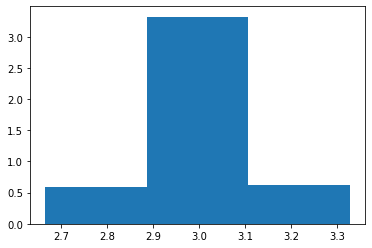

Areas: [0.58890119 3.32049669 0.62061125]
Bin boundaries: [2.66532954 2.88607965 3.10682976 3.32757986]
Bin widths: [0.22075011 0.22075011 0.22075011]
Sum of areas x length of bins: 1.0


In [55]:
underestimate_heights, underestimate_bins, _ = plt.hist(sample, bins=3, density=True)
plt.show()
print("Areas: {}".format(underestimate_heights))
print("Bin boundaries: {}".format(underestimate_bins))
print("Bin widths: {}".format(np.diff(underestimate_bins)))
print("Sum of areas x length of bins: {}".format(sum(np.diff(underestimate_bins)*underestimate_heights)))

Our second histogram has many more bins, reducing bias but increasing variance.

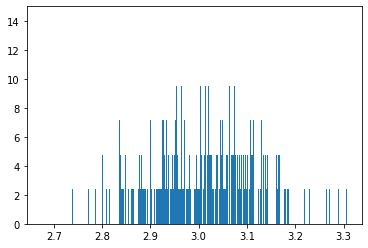

In [74]:
overestimate_heights, overestimate_bins, _ = plt.hist(sample, bins=1500, density=True)
plt.show()

In [75]:
def histogram_pdf_estimate(heights, bin_boundaries):
    def histogram_function(x):
        for i in range(len(bin_boundaries)-1):
            if x >= bin_boundaries[i] and x < bin_boundaries[i+1]:
               # print("Checking: x between {} and {}".format())
                return heights[i]
        return 0
    return histogram_function

underestimated_pdf = histogram_pdf_estimate(underestimate_heights, underestimate_bins)
overestimated_pdf = histogram_pdf_estimate(overestimate_heights, overestimate_bins)

In [76]:
def calculate_error(actual_pdf, estimate_pdf):
    return integrate.quad(lambda x: (estimate_pdf(x)-actual_pdf(x))**2, -np.inf, np.inf, limit=3000)

print("Overtimate error: {}, Underestimate error: {}".format(calculate_error(actual_pdf, overestimated_pdf), calculate_error(actual_pdf, underestimated_pdf)))

<ipython-input-76-a2f74950f021>:2: IntegrationWarning: The maximum number of subdivisions (3000) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(lambda x: (estimate_pdf(x)-actual_pdf(x))**2, -np.inf, np.inf, limit=3000)


Overtimate error: (2.287195632591539, 0.0012159571805434588), Underestimate error: (0.24262119046184694, 1.4222431606456759e-08)
